import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/Transformed Data Set - Sheet1.csv')
data = df.copy()
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [ ]:
data.isnull().sum()


,0
Favorite Color,0
Favorite Music Genre,0
Favorite Beverage,0
Favorite Soft Drink,0
Gender,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [ ]:
data['Gender'].value_counts()

,count
Gender,
F,33
M,33


([<matplotlib.axis.XTick at 0x7e9bd975ee60>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

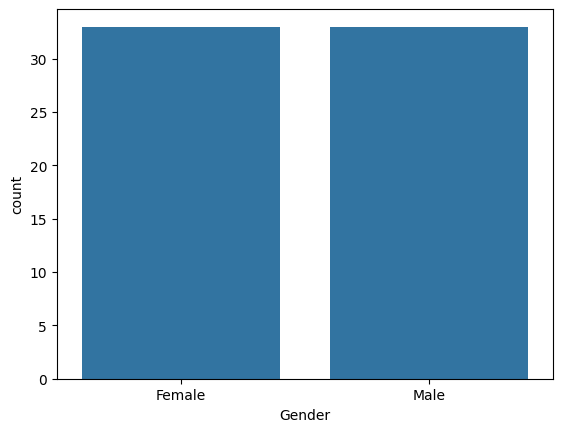

In [ ]:
sns.countplot(data=data,x='Gender')
plt.xticks([0,1],labels=['Female','Male'])

<Axes: xlabel='count', ylabel='Favorite Beverage'>

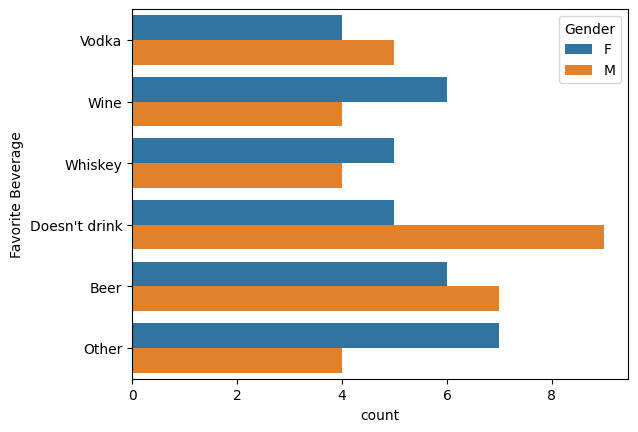

In [ ]:
sns.countplot(y=data['Favorite Beverage'],hue=data['Gender'])

([<matplotlib.patches.Wedge at 0x7e9bd8196e30>,
 [Text(1.0533111305044576, 0.8283330624546031, "Doesn't drink"),
  Text(-0.49802776293921897, 1.2440130012752106, 'Beer'),
  Text(-1.3384822403843963, 0.06375964378481754, 'Other'),
  Text(-0.7772761256601584, -1.091531870573981, 'Wine'),
  Text(0.37752181767772525, -1.2857205284109399, 'Vodka'),
  Text(1.218906970903863, -0.5566559047400554, 'Whiskey')],
 [Text(0.5816792810248498, 0.4574376613555271, '21.21%'),
  Text(-0.2750302571455388, 0.686992254435564, '19.70%'),
  Text(-0.7391618342421293, 0.035210549552809674, '16.67%'),
  Text(-0.4292420395436695, -0.6027862568841387, '15.15%'),
  Text(0.20848219782202734, -0.7100247694209667, '13.64%'),
  Text(0.6731277302006408, -0.3074069921698813, '13.64%')])

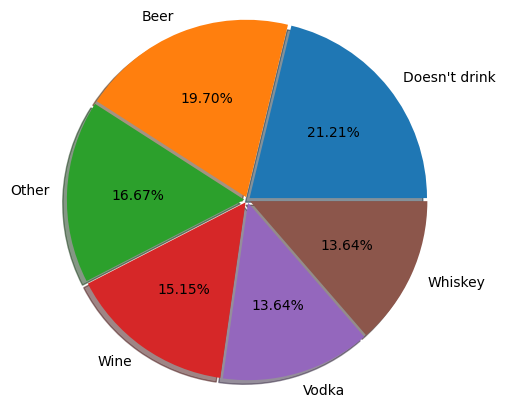

In [ ]:
plt.pie(data=data,x=[data['Favorite Beverage'].value_counts().iloc[0],data['Favorite Beverage'].value_counts().iloc[1],data['Favorite Beverage'].value_counts().iloc[2],data['Favorite Beverage'].value_counts().iloc[3],data['Favorite Beverage'].value_counts().iloc[4],data['Favorite Beverage'].value_counts().iloc[5]],labels=["Doesn't drink","Beer","Other","Wine","Vodka","Whiskey"],autopct='%.2f%%',explode=[0.02,0.02,0.02,0.02,0.02,0.02],radius=1.2,shadow=True)

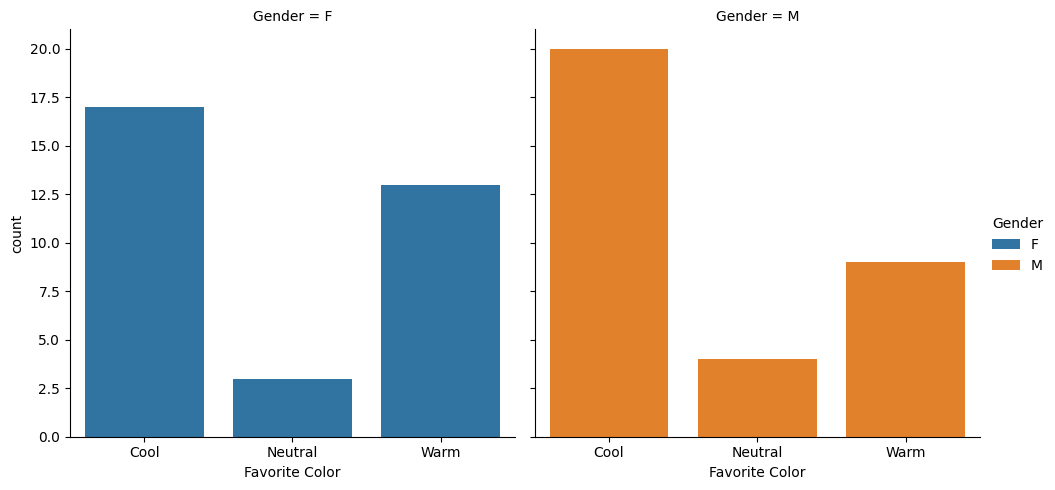

In [ ]:
sns.catplot(data=data,x='Favorite Color',col='Gender',hue='Gender',kind='count')

In [ ]:
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
...,...,...,...,...,...
61,0,6,3,1,1
62,0,2,0,1,1
63,1,2,1,2,1
64,0,6,5,1,1


In [ ]:
X = data.drop(columns=['Gender'],axis=1)
y = data['Gender']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
#LinearSVC doesn't have predict_proba method but we need this method. So we use CalibratedClassifierCV.
voting_clf = VotingClassifier([
    ('CSVC',CalibratedClassifierCV(LinearSVC(random_state=42))),
    ('SVC',SVC(random_state=42)),
    ('DecisionTree',DecisionTreeClassifier(random_state=42))
],n_jobs=-1,voting='hard')

voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('CSVC',
                              CalibratedClassifierCV(estimator=LinearSVC(random_state=42))),
                             ('SVC', SVC(random_state=42)),
                             ('DecisionTree',
                              DecisionTreeClassifier(random_state=42))],
                 n_jobs=-1)

In [ ]:
train_pred = voting_clf.predict(X_train)

In [ ]:
voting_clf.estimators_

[CalibratedClassifierCV(estimator=LinearSVC(random_state=42)),
 SVC(random_state=42),
 DecisionTreeClassifier(random_state=42)]

In [ ]:
for model in voting_clf.estimators_:
    train_pred = model.predict(X_train)
    print("{}-Classification Report".format(type(model)))
    print(classification_report(y_train,train_pred))
    print("======================================")

<class 'sklearn.calibration.CalibratedClassifierCV'>-Classification Report
              precision    recall  f1-score   support

           0       0.41      0.40      0.41        30
           1       0.40      0.41      0.41        29

    accuracy                           0.41        59
   macro avg       0.41      0.41      0.41        59
weighted avg       0.41      0.41      0.41        59

<class 'sklearn.svm._classes.SVC'>-Classification Report
              precision    recall  f1-score   support

           0       0.71      0.97      0.82        30
           1       0.94      0.59      0.72        29

    accuracy                           0.78        59
   macro avg       0.83      0.78      0.77        59
weighted avg       0.82      0.78      0.77        59

<class 'sklearn.tree._classes.DecisionTreeClassifier'>-Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00     